In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sb 
from scipy import stats

In [2]:
df= pd.read_csv('spreadspoke_scores.csv',
                 encoding='utf-8')

df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [3]:
sum_column = df["score_home"] + df["score_away"]
df["Total Score"] = sum_column
columns = ["schedule_date","schedule_week","schedule_playoff","team_favorite_id","spread_favorite",
          "stadium","stadium_neutral", 
           "score_home","score_away","team_home","team_away"]
df.drop(columns= columns,inplace=True) 
df.shape

(13232, 7)

In [4]:
#df2 = df[df['schedule_season'] >= 1999]
#df2 = df2[df2['schedule_season'] <= 2022]
df2 = df 
df2.dropna()

,schedule_season,over_under_line,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,Total Score
538,1968,40,66.0,12.0,80.0,Rain,23.0
727,1969,39,55.0,14.0,84.0,Rain,30.0
2500,1978,37,71.0,18.0,84.0,Rain,66.0
9774,2009,38.5,71.0,8.0,87.0,Rain,37.0
9780,2009,45.5,64.0,14.0,84.0,Rain,36.0
...,...,...,...,...,...,...,...
11039,2013,53.5,59.0,3.0,79.0,DOME (Open Roof),50.0
11045,2013,43,50.0,6.0,94.0,Fog,27.0
11057,2013,46,41.0,8.0,100.0,Rain | Fog,54.0
11059,2013,44.5,42.0,5.0,100.0,Rain | Fog,26.0


In [5]:
df2['over_under_line'].replace(' ',"NaN", inplace=True)

In [6]:
Line = df2['over_under_line'].astype(float)
Temp = df2['weather_temperature'] 
Wind = df2['weather_wind_mph'] 
Humidity = df2['weather_humidity'] 
Detail = df2['weather_detail'] 
Score = df2['Total Score']

# Line Comparison

In [7]:
line_vs_temp = Line.to_frame().join(Temp.to_frame()) 
line_vs_temp['over_under_line'].corr(line_vs_temp['weather_temperature'])

0.17056589584275794

In [8]:
model = stats.linregress(
    x = line_vs_temp['weather_temperature'].fillna(0),
    y = line_vs_temp['over_under_line'].fillna(0),
)

model

LinregressResult(slope=0.11472122431818965, intercept=27.862029957838082, rvalue=0.14506068398745603, pvalue=3.806949324230873e-63, stderr=0.006802930380668704, intercept_stderr=0.39691389075788236)

In [9]:
line_vs_wind = Line.to_frame().join(Wind.to_frame()) 
line_vs_wind['over_under_line'].corr(line_vs_wind['weather_wind_mph'])

-0.2712310701809736

In [10]:
model2 = stats.linregress(
    x = line_vs_wind['weather_wind_mph'].fillna(0),
    y = line_vs_wind['over_under_line'].fillna(0),
)

model2

LinregressResult(slope=-0.6356027632854636, intercept=38.602385835270006, rvalue=-0.21564966506040958, pvalue=4.9974664085895754e-139, stderr=0.025021672020632935, intercept_stderr=0.23049430430203446)

In [11]:
line_vs_score = Line.to_frame().join(Score.to_frame())  
line_vs_score['over_under_line'].corr(line_vs_score['Total Score'])

0.30018231955272656

In [12]:
model4 = stats.linregress(
    x = line_vs_score['over_under_line'].fillna(0),
    y = line_vs_score['Total Score'].fillna(0),
)

model4

LinregressResult(slope=0.1278057923867292, intercept=37.8504888934695, rvalue=0.1526968366572052, pvalue=7.554383920795538e-70, stderr=0.007191467790548863, intercept_stderr=0.2744956275005581)

In [13]:
line_vs_detail = Line.to_frame().join(Detail.to_frame()) 

In [14]:
means = line_vs_detail.groupby('weather_detail')["over_under_line"].mean() 
means.to_frame()    
means.sort_values(ascending = False)

weather_detail
DOME (Open Roof)        44.214286
Snow | Fog              44.200000
Fog                     43.946429
DOME                    43.907632
Rain                    43.595455
Snow                    41.785714
Snow | Freezing Rain    41.500000
Rain | Fog              41.159091
Name: over_under_line, dtype: float64

In [15]:
Line.mean()

42.21053272165528

# Score Comparison

In [16]:
score_vs_temp = Score.to_frame().join(Temp.to_frame()) 
score_vs_temp['Total Score'].corr(score_vs_temp['weather_temperature'])

0.05657356384002802

In [17]:
model5 = stats.linregress(
    x = score_vs_temp['weather_temperature'].fillna(0),
    y = score_vs_temp['Total Score'].fillna(0),
)

model5

LinregressResult(slope=0.0019205424711391944, intercept=42.10121094633346, rvalue=0.002901411754632386, pvalue=0.7385909948859517, stderr=0.005754833981269143, intercept_stderr=0.33576318121113624)

In [18]:
score_vs_wind = Score.to_frame().join(Wind.to_frame()) 
score_vs_wind['Total Score'].corr(score_vs_wind['weather_wind_mph'])

-0.13800789977875708

In [19]:
model6 = stats.linregress(
    x = score_vs_wind['weather_wind_mph'].fillna(0),
    y = score_vs_wind['Total Score'].fillna(0),
)

model6

LinregressResult(slope=-0.34854973267607253, intercept=44.689128075263625, rvalue=-0.14128864759825724, pvalue=5.753343922993507e-60, stderr=0.021232391558529247, intercept_stderr=0.19558826112483724)

In [20]:
score_vs_detail = Detail.to_frame().join(Score.to_frame()) 

In [21]:
means2 = score_vs_detail.groupby('weather_detail')["Total Score"].mean() 
means2.to_frame()    
means2.sort_values(ascending = False)

weather_detail
Snow | Fog              57.200000
Snow | Freezing Rain    55.000000
Fog                     45.535714
DOME                    44.448356
DOME (Open Roof)        42.732143
Rain                    42.236364
Snow                    42.214286
Rain | Fog              39.454545
Name: Total Score, dtype: float64

In [22]:
Score.mean()

42.20837427254176

# Visualizations

In [29]:
line_vs_score['Year'] = df['schedule_season']  
#line_vs_score.set_index('Year') 
prob_df = line_vs_score.groupby('Year').agg({'over_under_line':"mean",
                                        "Total Score":'mean'})
prob_df.dropna()

,over_under_line,Total Score
Year,,
1967,43.000000,44.355556
1968,40.000000,42.218085
1969,39.000000,41.841270
1970,36.000000,38.084656
1971,34.000000,38.428571
1972,33.000000,40.164021
1973,33.000000,39.010582
1974,33.000000,36.370370
1975,36.000000,41.211640


Text(0.5, 1.0, 'Vegas Line vs. Actual Score Comparing Season Averages')

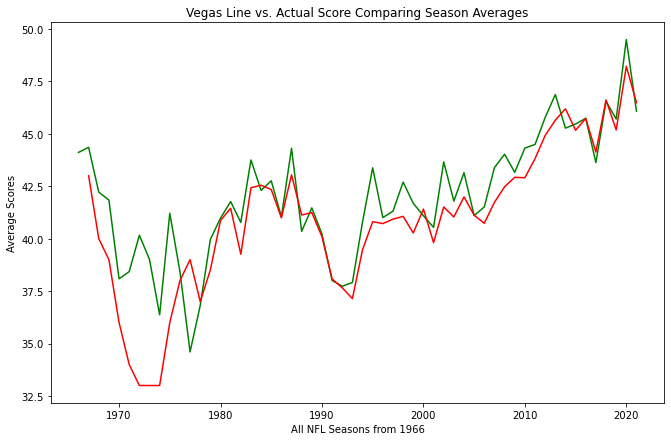

In [31]:
#X = prob_df.index.to_list()
f,ax = plt.subplots(figsize = (11,7)) 
prob_df['Total Score'].plot(ax=ax, color = 'g')  
prob_df['over_under_line'].plot(ax=ax, color = 'r')
#ax.set_xticks(X)  
#for xc in X:
    #plt.axvline(x=xc)
ax.set_xlabel('All NFL Seasons from 1966')
ax.set_ylabel('Average Scores')
ax.set_title('Vegas Line vs. Actual Score Comparing Season Averages')

In [35]:
#line_vs_score['Year'] = df['schedule_season']  
#line_vs_score.set_index('Year') 
std_df = line_vs_score.groupby('Year').agg({'over_under_line':"std",
                                        "Total Score":'std'})
print(std_df['over_under_line'].mean()) 
print(std_df['Total Score'].mean())

4.0004699594245094
14.126363363195818


Text(0.5, 1.0, 'Vegas Line vs. Actual Score Comparing Season Standard Deviations')

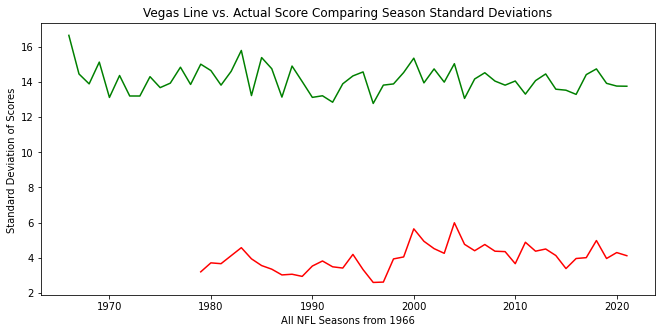

In [33]:
f,ax = plt.subplots(figsize = (11,5)) 
std_df['Total Score'].plot(ax=ax, color = 'g')  
std_df['over_under_line'].plot(ax=ax, color = 'r')
#ax.set_xticks(X)  
#for xc in X:
    #plt.axvline(x=xc)  
ax.set_xlabel('All NFL Seasons from 1966')
ax.set_ylabel('Standard Deviation of Scores ')
ax.set_title('Vegas Line vs. Actual Score Comparing Season Standard Deviations')

In [27]:
line_vs_score['Over Hit'] = line_vs_score[['Total Score']].sum(axis=1) > line_vs_score[['over_under_line']].sum(axis=1) 
line_vs_score['Over Hit'] = line_vs_score["Over Hit"].astype(int) 
line_vs_score

,over_under_line,Total Score,Year,Over Hit
7095,49.0,31.0,1999,0
7096,38.0,37.0,1999,0
7097,37.0,43.0,1999,1
7098,43.0,52.0,1999,1
7099,45.5,45.0,1999,0
...,...,...,...,...
13227,54.0,78.0,2021,1
13228,48.0,57.0,2021,1
13229,54.5,51.0,2021,0
13230,46.0,37.0,2021,0


In [28]:
(len(line_vs_score[line_vs_score['Over Hit']==1])/len(line_vs_score))*100 

48.346097441746785

In [29]:
from scipy.stats import ttest_ind

In [30]:
line_vs_score = line_vs_score.dropna()

Ttest_indResult(statistic=3.248812579812625, pvalue=0.001161996398252073)

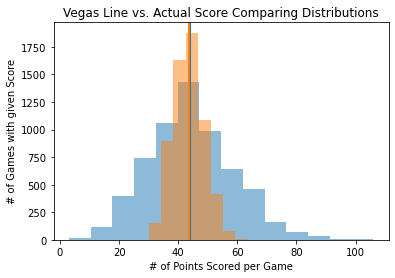

In [31]:
Score = line_vs_score['Total Score']
Line = line_vs_score['over_under_line']

# Visualize both
f,ax = plt.subplots()
ax.hist(Score,bins=14,alpha=.5)
ax.hist(Line,bins=8,alpha=.5)

# Add vlines for their means
ax.axvline(Score.mean(),c='tab:blue',lw=2)
ax.axvline(Line.mean(),c='tab:orange',lw=2)

# Label axes!
ax.set_xlabel('# of Points Scored per Game')
ax.set_ylabel('# of Games with given Score')
ax.set_title('Vegas Line vs. Actual Score Comparing Distributions')

# Perform the t-test
ttest_ind(Score,Line)

In [32]:
Score.mean()

44.1264667535854

In [33]:
Line.mean()

43.4995110821382

In [34]:
less_Line = []
for x in Score: 
    if x < Line.mean():
        less_Line.append(x) 
less_Line

[31.0,
 37.0,
 43.0,
 29.0,
 37.0,
 30.0,
 43.0,
 20.0,
 42.0,
 27.0,
 41.0,
 38.0,
 36.0,
 35.0,
 39.0,
 24.0,
 35.0,
 31.0,
 27.0,
 26.0,
 30.0,
 43.0,
 39.0,
 30.0,
 41.0,
 39.0,
 42.0,
 23.0,
 34.0,
 32.0,
 24.0,
 26.0,
 42.0,
 34.0,
 35.0,
 31.0,
 20.0,
 35.0,
 43.0,
 41.0,
 17.0,
 35.0,
 30.0,
 30.0,
 37.0,
 29.0,
 23.0,
 25.0,
 22.0,
 34.0,
 34.0,
 36.0,
 20.0,
 41.0,
 31.0,
 29.0,
 23.0,
 23.0,
 43.0,
 33.0,
 41.0,
 29.0,
 34.0,
 34.0,
 42.0,
 37.0,
 9.0,
 22.0,
 30.0,
 23.0,
 43.0,
 23.0,
 34.0,
 37.0,
 25.0,
 40.0,
 34.0,
 37.0,
 40.0,
 27.0,
 42.0,
 17.0,
 19.0,
 33.0,
 42.0,
 26.0,
 38.0,
 40.0,
 9.0,
 30.0,
 37.0,
 31.0,
 37.0,
 27.0,
 41.0,
 22.0,
 43.0,
 24.0,
 43.0,
 30.0,
 29.0,
 26.0,
 36.0,
 20.0,
 38.0,
 24.0,
 19.0,
 19.0,
 37.0,
 23.0,
 26.0,
 38.0,
 26.0,
 19.0,
 33.0,
 41.0,
 35.0,
 36.0,
 30.0,
 35.0,
 33.0,
 35.0,
 39.0,
 31.0,
 39.0,
 38.0,
 38.0,
 43.0,
 21.0,
 33.0,
 41.0,
 24.0,
 22.0,
 23.0,
 43.0,
 37.0,
 39.0,
 37.0,
 26.0,
 18.0,
 31.0,
 41.0,
 23.0,
 

In [35]:
more_Line =[] 
for x in Score: 
    if x > Line.mean(): 
        more_Line.append(x) 
more_Line

[52.0,
 45.0,
 44.0,
 58.0,
 49.0,
 48.0,
 71.0,
 76.0,
 59.0,
 59.0,
 71.0,
 49.0,
 52.0,
 47.0,
 46.0,
 48.0,
 46.0,
 74.0,
 45.0,
 49.0,
 65.0,
 46.0,
 62.0,
 54.0,
 48.0,
 61.0,
 45.0,
 60.0,
 58.0,
 56.0,
 47.0,
 47.0,
 47.0,
 51.0,
 58.0,
 45.0,
 70.0,
 50.0,
 58.0,
 47.0,
 50.0,
 57.0,
 51.0,
 44.0,
 51.0,
 46.0,
 63.0,
 45.0,
 65.0,
 48.0,
 64.0,
 50.0,
 44.0,
 61.0,
 48.0,
 53.0,
 62.0,
 54.0,
 62.0,
 58.0,
 71.0,
 47.0,
 55.0,
 47.0,
 55.0,
 55.0,
 54.0,
 74.0,
 50.0,
 71.0,
 69.0,
 51.0,
 72.0,
 64.0,
 59.0,
 44.0,
 48.0,
 55.0,
 51.0,
 65.0,
 54.0,
 52.0,
 66.0,
 45.0,
 45.0,
 47.0,
 44.0,
 55.0,
 51.0,
 57.0,
 51.0,
 50.0,
 46.0,
 46.0,
 55.0,
 69.0,
 58.0,
 44.0,
 73.0,
 79.0,
 69.0,
 83.0,
 63.0,
 69.0,
 86.0,
 47.0,
 64.0,
 55.0,
 57.0,
 77.0,
 63.0,
 75.0,
 45.0,
 56.0,
 69.0,
 51.0,
 55.0,
 60.0,
 71.0,
 52.0,
 57.0,
 65.0,
 48.0,
 61.0,
 65.0,
 45.0,
 46.0,
 57.0,
 47.0,
 47.0,
 55.0,
 51.0,
 48.0,
 47.0,
 88.0,
 50.0,
 55.0,
 62.0,
 53.0,
 47.0,
 51.0,
 44.0,
 54.0,

In [36]:
Prob_Score_Under = len(less_Line)/len(Score)  
Prob_Score_Under

0.5003259452411994

In [37]:
Prob_Score_Over = len(more_Line)/len(Score) 
Prob_Score_Over

0.4996740547588005

In [38]:
less_Line2 = []
for x in Line: 
    if x < Line.mean():
        less_Line2.append(x) 
less_Line2

[38.0,
 37.0,
 43.0,
 38.0,
 37.0,
 42.0,
 39.0,
 37.5,
 42.0,
 42.0,
 43.0,
 38.0,
 42.0,
 39.0,
 40.5,
 43.0,
 40.5,
 41.0,
 41.0,
 36.5,
 42.5,
 40.0,
 42.0,
 36.5,
 38.0,
 39.5,
 39.5,
 38.0,
 38.0,
 40.5,
 38.0,
 36.5,
 37.0,
 38.0,
 42.5,
 40.0,
 40.5,
 35.5,
 42.0,
 38.5,
 40.5,
 40.5,
 40.5,
 37.5,
 38.0,
 36.0,
 40.0,
 40.5,
 41.0,
 35.5,
 38.0,
 37.0,
 38.5,
 40.0,
 40.5,
 35.0,
 37.5,
 40.0,
 37.5,
 42.5,
 36.5,
 42.5,
 37.5,
 37.0,
 36.0,
 34.0,
 40.5,
 34.0,
 37.0,
 37.5,
 38.0,
 36.5,
 37.0,
 40.5,
 40.0,
 36.5,
 38.0,
 35.0,
 35.0,
 33.5,
 37.0,
 33.5,
 42.5,
 41.0,
 36.0,
 32.5,
 40.5,
 37.0,
 33.5,
 35.0,
 35.5,
 41.5,
 40.0,
 35.5,
 37.0,
 43.0,
 41.0,
 38.0,
 37.0,
 38.5,
 41.5,
 36.0,
 42.0,
 34.5,
 41.0,
 34.5,
 37.0,
 35.0,
 34.5,
 35.5,
 39.0,
 35.0,
 37.5,
 37.5,
 36.0,
 41.0,
 36.0,
 34.5,
 36.5,
 37.0,
 38.0,
 36.5,
 38.0,
 40.0,
 35.5,
 34.5,
 37.0,
 36.0,
 37.0,
 42.5,
 40.5,
 37.0,
 37.0,
 39.5,
 36.5,
 39.0,
 39.0,
 38.5,
 43.0,
 38.0,
 34.0,
 41.0,
 36.0,

In [39]:
more_Line2 = []
for x in Line: 
    if x > Line.mean():
        more_Line2.append(x) 
more_Line2

[49.0,
 45.5,
 49.0,
 44.5,
 44.0,
 47.5,
 45.0,
 47.5,
 45.0,
 43.5,
 43.5,
 44.0,
 45.5,
 44.0,
 45.5,
 44.5,
 43.5,
 45.5,
 45.5,
 45.0,
 45.0,
 44.0,
 43.5,
 44.0,
 44.0,
 48.5,
 43.5,
 45.0,
 46.0,
 44.5,
 44.0,
 45.0,
 45.0,
 47.0,
 47.5,
 48.0,
 47.5,
 44.5,
 44.0,
 44.0,
 43.5,
 47.0,
 49.0,
 49.5,
 46.5,
 49.0,
 46.5,
 46.0,
 51.0,
 46.5,
 49.0,
 43.5,
 45.5,
 47.5,
 46.5,
 46.5,
 48.5,
 44.0,
 46.5,
 46.0,
 46.5,
 46.5,
 52.0,
 46.0,
 45.0,
 46.5,
 44.0,
 44.0,
 46.5,
 47.5,
 48.5,
 47.0,
 44.0,
 48.0,
 46.0,
 48.5,
 44.0,
 55.5,
 44.0,
 55.0,
 47.0,
 45.0,
 44.0,
 47.5,
 47.5,
 53.5,
 43.5,
 48.5,
 44.0,
 44.0,
 49.5,
 43.5,
 44.0,
 58.5,
 50.0,
 47.0,
 56.0,
 44.5,
 44.0,
 45.5,
 44.5,
 47.0,
 63.0,
 45.0,
 48.0,
 45.5,
 44.0,
 59.5,
 47.5,
 52.5,
 46.0,
 48.5,
 52.0,
 50.0,
 46.0,
 46.5,
 47.5,
 56.0,
 48.0,
 44.5,
 44.0,
 45.5,
 53.5,
 44.0,
 48.5,
 58.0,
 45.0,
 44.0,
 44.0,
 48.0,
 47.0,
 47.5,
 56.5,
 45.0,
 47.5,
 47.0,
 49.0,
 45.5,
 49.0,
 48.5,
 53.5,
 56.0,
 45.5,

In [40]:
Prob_Line_Under = len(less_Line2)/len(Line) 
Prob_Line_Under

0.4758800521512386

In [41]:
Prob_Line_Over = len(more_Line2)/len(Line)   
Prob_Line_Over

0.5241199478487614

In [42]:
Over_Given_Over = ((Prob_Score_Over*Prob_Line_Over))
Over_Given_Over

0.2618891395215617

In [43]:
Under_Given_Under = ((Prob_Score_Under*Prob_Line_Under))
Under_Given_Under 

0.23809513691399972

In [44]:
Over_Given_Under = ((Prob_Score_Over*Prob_Line_Under)) 
Over_Given_Under

0.23778491523723883

In [45]:
Under_Given_Over = ((Prob_Score_Under*Prob_Line_Over)) 
Under_Given_Over

0.2622308083271997

In [46]:
w_detail = means.to_frame().join(means2.to_frame())

Text(0.5, 1.0, 'Vegas Line vs. Actual Score Comparing Average Scores of Wheather Details')

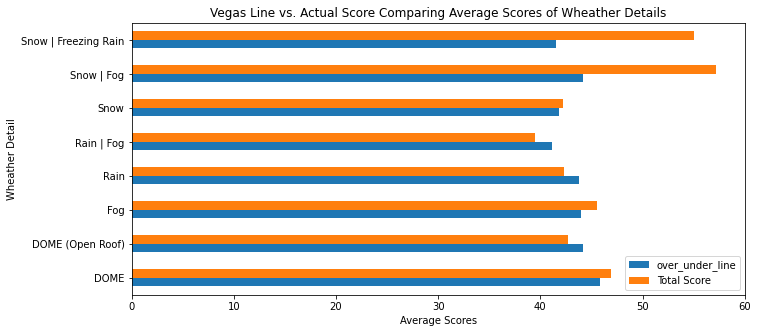

In [47]:
f,ax = plt.subplots(figsize = (11,5))  
w_detail.plot.barh(ax=ax) 
ax.set_xlabel('Average Scores')
ax.set_ylabel('Wheather Detail')
ax.set_title('Vegas Line vs. Actual Score Comparing Average Scores of Wheather Details')

In [57]:
columns = (['Snow | Freezing Rain '])
std = score_vs_detail.groupby('weather_detail')["Total Score"].std()    
std = std.dropna() 
std.to_frame()

,Total Score
weather_detail,
DOME,13.996043
DOME (Open Roof),12.903123
Fog,15.433206
Rain,12.714137
Rain | Fog,16.448266
Snow,11.859294
Snow | Fog,8.467585


In [58]:
std2 = line_vs_detail.groupby('weather_detail')["over_under_line"].std() 
std2 = std2.dropna() 
std2.to_frame()

,over_under_line
weather_detail,
DOME,4.783995
DOME (Open Roof),3.493965
Fog,4.085519
Rain,4.024288
Rain | Fog,2.969633
Snow,4.272966
Snow | Fog,7.831028


In [59]:
w2_detail = std2.to_frame().join(std.to_frame()) 

Text(0.5, 1.0, 'Vegas Line vs. Actual Score Comparing Standard Deviation for Wheather Details')

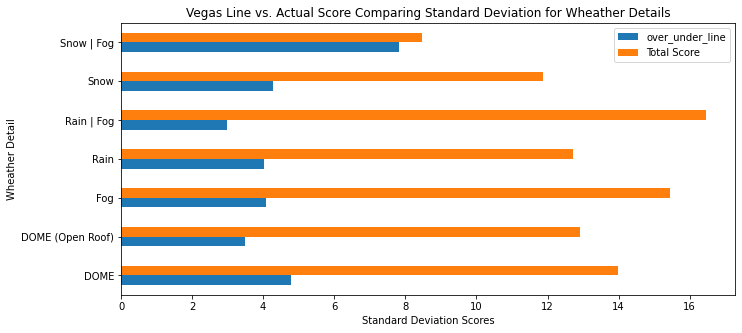

In [60]:
f,ax = plt.subplots(figsize = (11,5))  
w2_detail.plot.barh(ax=ax) 
ax.set_xlabel('Standard Deviation Scores')
ax.set_ylabel('Wheather Detail')
ax.set_title('Vegas Line vs. Actual Score Comparing Standard Deviation for Wheather Details')

In [79]:
cols_to_use = w_detail.columns.difference(w2_detail.columns)
dfNew = pd.merge(w_detail,w2_detail,left_index=True, right_index=True, how='outer') 


#Drop duplicate columns
frame = dfNew.T.drop_duplicates().T 
frame2 = frame.rename(columns =({'over_under_line_x':'Average Line',"Total Score_x":"Average Score",
                           'over_under_line_y':'Std of Line',"Total Score_y":'Std of Score'})) 
frame2

,Average Line,Average Score,Std of Line,Std of Score
weather_detail,,,,
DOME,45.793315,46.894881,4.783995,13.996043
DOME (Open Roof),44.214286,42.732143,3.493965,12.903123
Fog,43.946429,45.535714,4.085519,15.433206
Rain,43.733645,42.308411,4.024288,12.714137
Rain | Fog,41.159091,39.454545,2.969633,16.448266
Snow,41.785714,42.214286,4.272966,11.859294
Snow | Fog,44.200000,57.200000,7.831028,8.467585


Text(0.5, 1.0, 'Vegas Line vs. Actual Score Comparing Standard Deviation and Averages')

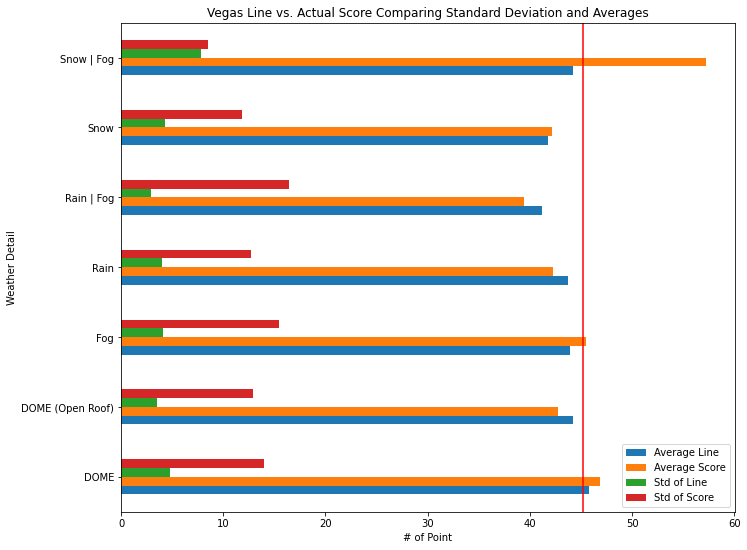

In [82]:
f,ax = plt.subplots(figsize = (11,9))  
frame2.plot.barh(ax=ax)     
ax.axvline(frame2['Average Score'].mean(),color='r')  
ax.set_xlabel('# of Point')
ax.set_ylabel('Weather Detail')
ax.set_title('Vegas Line vs. Actual Score Comparing Standard Deviation and Averages')